In [33]:
import json
import numpy as np

# Load data from JSON file
with open('data2.json', 'r') as file:
    data = json.load(file)

# Extract scores from JSON
lb_scores = []
t1_scores = []
t2_scores = []
t3_scores = []

for user_id, user_data in data["scores"].items():
    # Linebisection scores
    linebisection_scores = user_data["linebisection"]["0"]["errorCount"]
    lb_scores.append(linebisection_scores)

    # Verballearning scores
    t1_scores.append(user_data["verballearning"]["0"]["t1"])
    t2_scores.append(user_data["verballearning"]["0"]["t2"])
    t3_scores.append(user_data["verballearning"]["0"]["t3"])

# Calculate mean and standard deviation
lb_mean = np.mean(lb_scores)
lb_std = np.std(lb_scores)

t1_mean = np.mean(t1_scores)
t1_std = np.std(t1_scores)
t2_mean = np.mean(t2_scores)
t2_std = np.std(t2_scores)
t3_mean = np.mean(t3_scores)
t3_std = np.std(t3_scores)

# Print the results
print("linebisection errorCount Mean:", lb_mean)
print("linebisection errorCount SD:", lb_std)
print("verballearning Means:", "\nt1 mean:", t1_mean, "\nt2 mean:", t2_mean, "\nt3 mean:", t3_mean)
print("verballearning SDs:", "\nt1 SD:", t1_std, "\nt2 SD:", t2_std, "\nt3 SD:", t3_std)


linebisection errorCount Mean: 0.35135135135135137
linebisection errorCount SD: 0.47739247926096473
verballearning Means: 
t1 mean: 5.1891891891891895 
t2 mean: 7.513513513513513 
t3 mean: 7.72972972972973
verballearning SDs: 
t1 SD: 2.469684713850955 
t2 SD: 1.4069637929535534 
t3 SD: 1.0305770791858175


In [36]:
import matplotlib.pyplot as plt


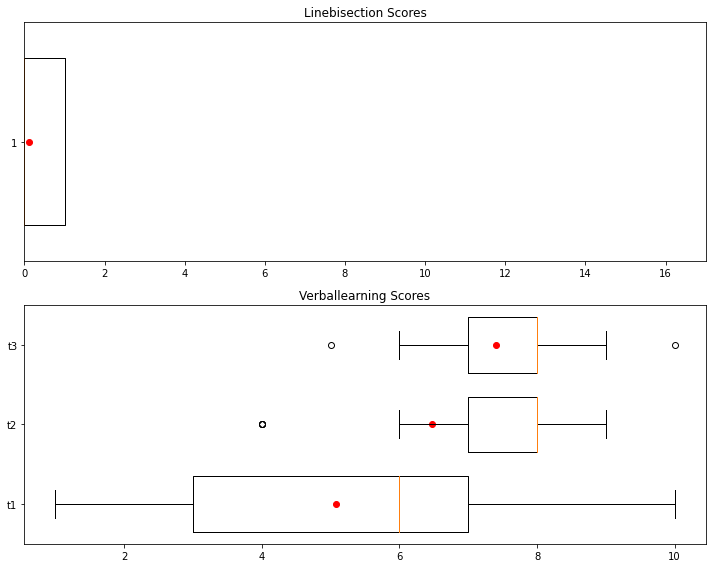

In [37]:
# Marked values
t1_mark = 5.08
t2_mark = 6.48
t3_mark = 7.4
lb_mark = 0.11

# Create a box plot
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Box plot for linebisection scores
axs[0].boxplot(lb_scores, vert=False, widths=0.7)
axs[0].scatter(lb_mark, 1, color='red', marker='o', label='Marked Value')
axs[0].set_title('Linebisection Scores')
axs[0].set_xlim([0, 17])  # Set x-axis limits

# Box plot for verballearning scores
verballearning_data = [t1_scores, t2_scores, t3_scores]
axs[1].boxplot(verballearning_data, vert=False, widths=0.7, labels=['t1', 't2', 't3'])
axs[1].scatter([t1_mark, t2_mark, t3_mark], [1, 2, 3], color='red', marker='o', label='Marked Values')
axs[1].set_title('Verballearning Scores')

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
import pingouin as pg

ModuleNotFoundError: No module named 'pingouin'

In [ ]:
# Reliability measures for verbal learning test (Cronbach's alpha)
verballearning_data = np.array([t1_scores, t2_scores, t3_scores]).T  # Transpose for correct format
cronbach_alpha = pg.cronbach_alpha(verballearning_data)

# Print the results
print("Cronbach's alpha for Verbal Learning Test:", cronbach_alpha)

In [34]:
def getOutliers(data_list):
	q1 = np.percentile(data_list, 25)
	q3 = np.percentile(data_list, 75)
	iqr = q3 - q1
	# lower outlier boundary
	lob = q1 - 1.5*iqr
	# upper outlier boundary
	uob = q3 + 1.5*iqr

	print(f"IQR: {iqr:.2f}")
	print(f"Q1: {q1:.2f}")
	print(f"Q3: {q3:.2f}")
	print(f"LOB: {lob:.2f}")
	print(f"UOB: {uob:.2f}")

IQR: 1.00
Q1: 7.00
Q3: 8.00
LOB: 5.50
UOB: 9.50
